In [22]:
%matplotlib inline
import pylab as pl
import numpy as np
from astropy import units as u, constants, visualization
visualization.quantity_support()
pl.style.use('dark_background')



# Lecture - Spectroscopy, Spectra, and Spectrographs

References:

http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L16/

http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L17/index.html

Goals:

 * Learn the basics of light dispersion
 * Learn about the key elements of a spectrograph:
   * dispersion element (grating or prism)
   * collimator
   * slit
 * Learn the math underlying light dispersion

# Spectroscopy

Spectroscopy is the measurement of light intensity or brightness as a function of wavelength.

The term 'spectroscopy' is usually reserved for $R=\frac{\lambda}{\Delta\lambda}>10$.

# Spectroscopy vs broadband imaging

Our usual BVRI filters have $R \sim 5$

<a href="http://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=Generic&asttype="> <img src="images/ubvri_filters.png"></a>

# How can we increase spectral resolution?

There are several ways to perform spectroscopy...

1. Heterodyne measurement 
  * used in radio, $R\sim10^6$ is easy
2. Energy-sensitive detectors 
  * used in X-ray: each photon produces $>1$ electron, with $n(e^-)~\propto~E(\gamma)$
3. Disperse (spread) the light such that wavelength $\lambda$ corresponds to location on the detector
  * used at all wavelengths

# Light Dispersion

There are several ways to disperse light:

1. Prisms  <img src="https://upload.wikimedia.org/wikipedia/en/3/3b/Dark_Side_of_the_Moon.png" style='width:100px; float:right;'>
2. Transmission Gratings
3. Reflection Gratings
4. Grisms (Prisms integrated into transmission gratings)

# Light Dispersion

<img src="images/fluorescentbulbgrating.jpg" style='max-height:600px'>
<a href="https://www.reddit.com/r/mildlyinteresting/comments/2p4812/fluorescent_light_viewed_through_a_diffraction/"> source </a>

# Light Dispersion

<img src="images/fluorescentbulbgrating_gray.jpg" style='max-height:600px'>
<a href="https://www.reddit.com/r/mildlyinteresting/comments/2p4812/fluorescent_light_viewed_through_a_diffraction/"> source </a>

# Light Dispersion

Dispersion is spreading light so that different colors land in different places.

When you have a color-sensitive camera, with broad-band filters, you can see how the light is separated.

In general, though, there is a problem: different colors of light still land on top of each other.  CCDs are generally insensitive to color (every photon produces an electron, and all electrons are identical).  We therefore can't tell the difference between green and red and blue if they overlap.

<a href="https://www.reddit.com/r/mildlyinteresting/comments/2p4812/fluorescent_light_viewed_through_a_diffraction/">
    <div style="margin: auto; margin-left: auto;
  margin-right: auto; width:60%; ">
<img src="images/fluorescentbulbgrating.jpg" style='max-height:300px; max-width:49%; display:inline-block;'>
<img src="images/fluorescentbulbgrating_gray.jpg" style='max-height:300px; max-width:49%; display:inline-block;'>
    </div>
</a>

# Telescope Optics

To understand how a spectrograph is used in practice, we need to revisit telescope optics.


# Telescope Optics

Recall definitions:

`f/#` is the f-number or focal ratio, the ratio of the `focal length` to the `entrance pupil diameter`.

For example, a lense with an 80cm focal length and 10cm aperture is referred to as an `f/8` lense.

# Simple telescope

The simplest telescope consists of a single lens bringing light to a focus at the image plane.  You place a detector there and you're done.  This is a _prime focus_ telescope, and is rarely - but sometimes! (SUPRIMECAM) - used in professional observatories.

<img src="images/PrimeFocus-520x200.jpg">
<a href="http://www.opticstar.com/Run/Astronomy/Astro-Editorial-Articles-General.asp?p=0_10_19_1_6_200_30">
source
</a>



# Simple telescope

The simplest telescope consists of a single lens bringing light to a focus at the image plane.  You place a detector there and you're done.  This is a _prime focus_ telescope, and is rarely - but sometimes! (SUPRIMECAM) - used in professional observatories.

<img src="images/Refractor-553x217.jpg">
<a href="http://www.opticstar.com/Run/Astronomy/Astro-Editorial-Articles-General.asp?p=0_10_19_1_6_200_30">
source
</a>



# Focal Length and plate scale

The Plate Scale is the ratio of the _angular size of the target_ to the _physical size of the image_.
<div style='display:inline-block;'>
    <div style='display:inline-block;'> Big:<br>
<img style='display:inline-block;' src="images/CCD_BigImage.svg">
    </div>
    <div style='display:inline-block;'> Small:<br>
        <img style='display:inline-block;' src="images/CCD_SmallImage.svg"></div>
</div>

$$p = \frac{\theta}{s} = \frac{1}{f}$$

The image size is simply $s = \theta f$ in the small angle approximation.  In terms of $N \equiv f/\# = f / D$, the size is then $s = \theta N D$.

# Focal Ratio Example

We have an f/8 telescope with 10 cm diameter.  How big will a 2-arcsecond image (a star blurred by the atmosphere) appear?

In [23]:
fnumber = 8
diameter = 10*u.cm
starsize = 2*u.arcsec

In [24]:
focal_length = diameter * fnumber
focal_length

<Quantity 80. cm>

In [25]:
# in the small angle approximation, sin(starsize) = starsize in radians
# but to convert units properly, we just don't bother with the approximation
image_size = np.sin(starsize) * focal_length

In [26]:
image_size.to(u.um)

<Quantity 7.7570189 um>

# Detector reminder....

Most CCDs have pixels 5-20 microns across.  

To achieve Nyquist sampling, we need the image size to be $\geq2\times$ the pixel size.

# How can we get a bigger image size $s$?

$$ s = f \theta = \theta N D$$

1. Increase the telescope diameter
2. Increase the F/# ($\equiv N$)

($\theta$ can't change, it's the size of the object - for normal ground-based optical observations, it's always about 1 arcsecond, give or take)

# Professional Telescopes - opposite problem

For a professional telescope, with $D = 8$ m, the image is too big.

We don't want to reduce the diameter, so we have to reduce the focal ratio (F/#).

We do this with a *focal reducer* or a *reimager*.

In [27]:
diameter = 8*u.m
focal_length = diameter * fnumber
image_size = np.sin(starsize) * focal_length
image_size.to(u.um)

<Quantity 620.56151181 um>

# Focal Reducers

A focal reducer can reduce the focal ratio and length.

<a href="https://agenaastro.com/articles/guides/focusers/focal-reducers-guide.html">
    <img src="images/focal-reducers-guide_8.jpg">
    </a>
 
$$f_{new} = f_{old} \left( 1 - \frac{d}{f_{reducer} }\right)$$

where $d$ is the distance from the first optic to the focal reducer.

# Reimager

<img src="images/reimager.png">

# Reimager

A reimager has effective focal length $f_{cam}$, so $s = f_{cam} \theta$.

To have a bigger or smaller image size $s$, then, you need a longer or shorter camera focal length $f_{cam}$, respectively.

# Reimager vs. Focal Reducer

A reimager allows you access to the *collimated beam* of the telescope. 

# Collimated Beam

The *collimated beam* is the incoming light stream with all rays parallel.

The rays coming in to the telescope aperture are also parallel.
However, in a reimager, the parallel rays are compressed into a smaller area.  This is helpful if you want to put in any optics, such as filters, since you can make them smaller!

# Slits and Dispersed Light

A reimager also allows you to do things like block out part of the sky.

To block out all the light except from the star, we place a _slit_ at the telescope focus instead of a detector, then we create an image of the slit using the reimager.

<a href="https://www.reddit.com/r/mildlyinteresting/comments/2p4812/fluorescent_light_viewed_through_a_diffraction/">
<img src="images/fluorescentbulbgrating.jpg" style='max-height:300px; float:left;'>
</a>
<img src="https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/wfpc2-stis.jpg" style="float:right; max-width:650px;">

# Slits
The slit blocks out unwanted light, preventing overlap between different colors of light.

<img src="images/wfpc2-stis.jpg" style="float:right;">

<img src="images/wfpc2-stis-narrowslit.jpg">

# Dispersers

The most commonly-used light disperser is a *diffraction grating*.  Prisms are also used, but we won't cover them further.

Diffraction is the process of passing light through a gap.

# Diffraction

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Doubleslit.gif">

# Diffraction Grating

A diffraction grating produces interference patterns.  We take advantage of the constructive interference to produce a spectrum.

# Condition for constructive interference: $n \lambda = d \sin \theta$
<img src="images/grating_littlefair_whitebg.png" style="float:left; max-height:500px">
<img src="images/dispersed_light_littlefair.jpg" style="float:right;">

<img src="images/dispersed_light_labeledorder.jpg">

The red line is a little bit longer than the green line: red constructive interference happens at a different place than blue and green.

<img src="images/reflectiongrating_whitebg_littlefair.png">

<img src="images/pepito_topdown.jpg">

# Diffraction Grating - number of slits

A two-element interferometer produces a peak, but it's broad and therefore blurry.

As you add more equally-spaced elements to the grating, the peaks get narrower, with less of the light getting smeared out.

<img src="images/grating_multislit_littlefair.png" style='max-height:600px'>

<img src="images/spectrograph_response_twogap.png">

<img src="images/spectrograph_response_fourgap.png">

<img src="images/spectrograph_response_sixgap.png">

<img src="images/spectrograph_response_eightgap.png">

<img src="images/spectrograph_response.png">

# Diffraction Grating: Real gaps have finite width

The Fourier Transform of an aperture is an Airy function, so we end up with an Airy function that pushes most of the power into the 0'th order:

<img src="images/spectrograph_response_finite_slitwidth.png" style='max-height:600px'>

# Overlapping Orders

The dispersion angle from orders $>0$ changes with wavelength.

Short wavelengths of high orders overlap with long wavelengths of low orders.

This overlap provides one limitation on the free spectral range.  Very loosely, the free spectral range is of order the central wavelength, $\sim\lambda$.



<img src="images/spectrograph_response_wavelength_dependence.png">

fin

# Below here are notes used for creation of the slides

In [28]:
wavelength = 500*u.nm
separation = 4*u.um
scalenumber = 4
norders = 4

widthpix = 3
separation_pixels = scalenumber * norders

# separation is scalenumber * norders pixels
width = widthpix / (separation_pixels) * separation
angle_to_first_peak = np.arcsin(wavelength / separation).to(u.deg)
angle_to_first_peak.to(u.deg)
angle_to_fourth_order = np.arcsin(norders * wavelength / separation).to(u.deg)
angle_to_first_peak, angle_to_fourth_order

(<Quantity 7.18075578 deg>, <Quantity 30. deg>)

In [29]:
width

<Quantity 0.75 um>

In [30]:
sz = 4096

ftax = np.fft.fftshift(np.fft.fftfreq(sz)*scalenumber * angle_to_fourth_order)

twoslit = np.zeros(sz)
twoslit[:norders*2*scalenumber:norders*scalenumber] = 1
fourslit = twoslit.copy()
fourslit[:norders*4*scalenumber:norders*scalenumber] = 1
sixslit = fourslit.copy()
sixslit[:norders*6*scalenumber:norders*scalenumber] = 1
eightslit = sixslit.copy()
eightslit[:norders*8*scalenumber:norders*scalenumber] = 1
assert eightslit.sum() == 8

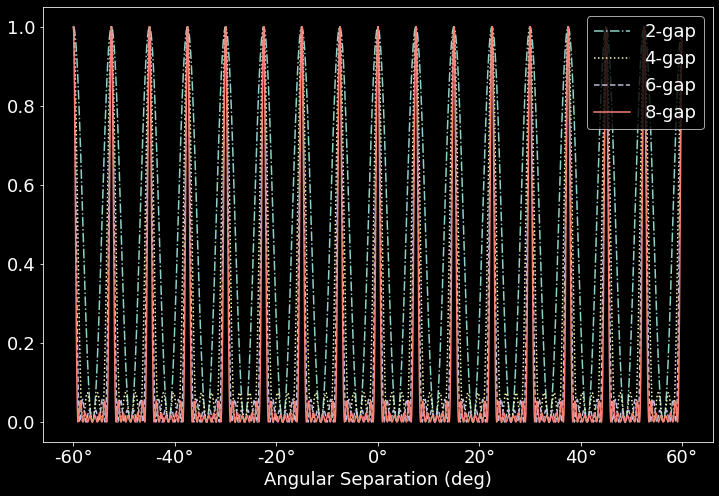

In [31]:
pl.rcParams['font.size'] = 18

twoslitft = np.abs(np.fft.fft(twoslit/twoslit.sum())**2)
fourslitft = np.abs(np.fft.fft(fourslit/fourslit.sum())**2)
sixslitft = np.abs(np.fft.fft(sixslit/sixslit.sum())**2)
eightslitft = np.abs(np.fft.fft(eightslit/eightslit.sum())**2)

#pl.plot(np.fft.fftshift(twoslitft))
pl.figure(figsize=(12,8))
pl.plot(ftax, np.fft.fftshift(twoslitft), '-.', label='2-gap')
pl.plot(ftax, np.fft.fftshift(fourslitft), ':', label='4-gap')
pl.plot(ftax, np.fft.fftshift(sixslitft), '--', label='6-gap')
pl.plot(ftax, np.fft.fftshift(eightslitft), label='8-gap')

pl.xlabel("Angular Separation (deg)")
pl.legend(loc='upper right', fontsize=18)
pl.savefig("images/spectrograph_response.png")

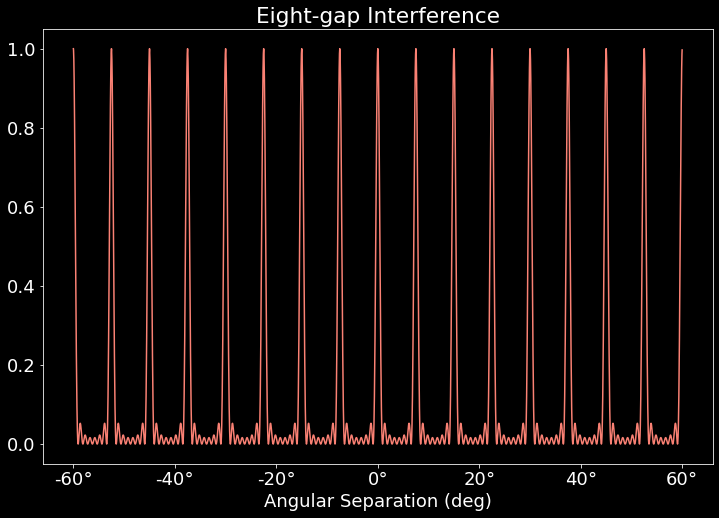

In [32]:
pl.rcParams['font.size'] = 18

#pl.plot(np.fft.fftshift(twoslitft))
pl.figure(figsize=(12,8))


L1, = pl.plot(ftax, np.fft.fftshift(twoslitft), '-.', label='2-gap')
pl.xlabel("Angular Separation (deg)")
pl.title("Two-gap Interference")
pl.savefig("images/spectrograph_response_twogap.png")
#pl.legend(loc='upper right', fontsize=18)

L1.set_visible(False)
L2, =pl.plot(ftax, np.fft.fftshift(fourslitft), ':', label='4-gap')
pl.title("Four-gap Interference")

pl.savefig("images/spectrograph_response_fourgap.png")

L2.set_visible(False)
L3, = pl.plot(ftax, np.fft.fftshift(sixslitft), '--', label='6-gap')
pl.title("Six-gap Interference")

pl.savefig("images/spectrograph_response_sixgap.png")

L3.set_visible(False)
L4, = pl.plot(ftax, np.fft.fftshift(eightslitft), label='8-gap')
pl.title("Eight-gap Interference")

pl.savefig("images/spectrograph_response_eightgap.png")




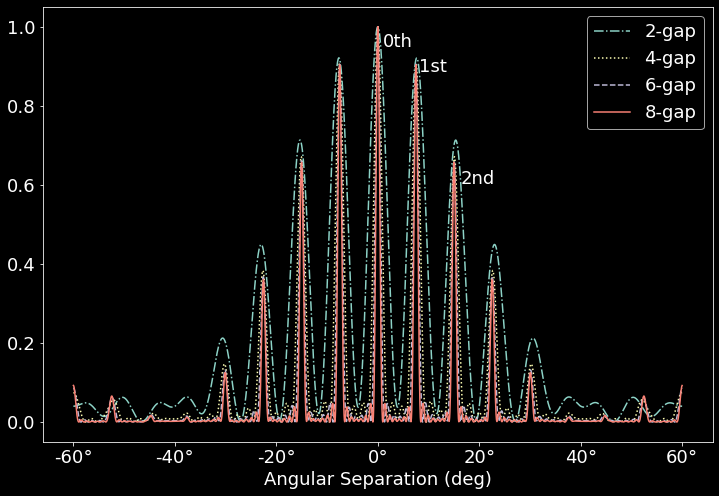

In [33]:
from astropy.convolution import convolve

fourslitsm = convolve(fourslit, [1,1,1])
twoslitsm = convolve(twoslit, [1,1,1])
sixslitsm = convolve(sixslit, [1,1,1])
eightslitsm = convolve(eightslit, [1,1,1])


twoslitft = np.abs(np.fft.fft(twoslitsm/twoslitsm.sum())**2)
fourslitft = np.abs(np.fft.fft(fourslitsm/fourslitsm.sum())**2)
sixslitft = np.abs(np.fft.fft(sixslitsm/sixslitsm.sum())**2)
eightslitft = np.abs(np.fft.fft(eightslitsm/eightslitsm.sum())**2)

#pl.plot(np.fft.fftshift(twoslitft))
pl.figure(figsize=(12,8))
pl.plot(ftax, np.fft.fftshift(twoslitft), '-.', label='2-gap')
pl.plot(ftax, np.fft.fftshift(fourslitft), ':', label='4-gap')
pl.plot(ftax, np.fft.fftshift(sixslitft), '--', label='6-gap')
pl.plot(ftax, np.fft.fftshift(eightslitft), label='8-gap')

pl.xlabel("Angular Separation (deg)")
pl.text(1*u.deg, 0.95, "0th", fontsize=18)

pkval1 = twoslitft[np.argmin(np.abs(np.fft.fftshift(ftax) - angle_to_first_peak))]
pkval2 = twoslitft[np.argmin(np.abs(np.fft.fftshift(ftax) - angle_to_first_peak*2))]

pl.text(angle_to_first_peak + 1*u.deg, pkval1, "1st", fontsize=18)
pl.text(angle_to_first_peak*2 + 2*u.deg, pkval2, "2nd", fontsize=18)


pl.legend(loc='upper right', fontsize=18)
pl.savefig("images/spectrograph_response_finite_slitwidth.png")

(0.0, 64.0)

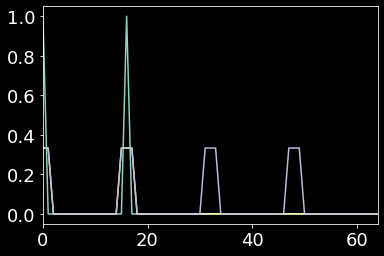

In [34]:
pl.plot(twoslit)
pl.plot(twoslitsm)
pl.plot(fourslitsm)

pl.xlim(0,64)

In [35]:
def makeplot(wavelength = 500, 
             separation = 4,
             norders = 4,
             gapwidth = 0.5,
             sz=4096,
            ):
    
    wavelength = u.Quantity(wavelength, u.nm)
    separation = u.Quantity(separation, u.um)
    gapwidth = u.Quantity(gapwidth, u.um)
    
    
    assert gapwidth < separation

    scalenumber = 2

    
    gapwidth_pix = gapwidth / separation * norders*scalenumber
    kernel=[1] * int(gapwidth_pix)
    if len(kernel) == 0:
        kernel = [1]
    elif len(kernel) % 2 == 0:
        kernel[-1] = 0.5
        kernel[0] =0.5
        kernel.append(0)
    
    
    
    # width = widthpix * separation / (scalenumber * norders)
    # scalenumber = width * separation / (gapwidth * norders)
    # scalenumber = (separation * gapwidthpix / (gapwidth * norders))
    #scalenumber = 2
    
    
    separation_pixels = scalenumber * norders

    # separation is scalenumber * norders pixels
    width = widthpix / (separation_pixels) * separation
    
    angle_to_nth_order = np.arcsin(norders * wavelength / separation).to(u.deg)
    
    angle_to_first_peak = np.arcsin(wavelength/separation).to(u.deg)
    
    
    ftax = np.fft.fftshift(np.fft.fftfreq(sz)*scalenumber * angle_to_nth_order)

    twoslit = np.zeros(sz)
    twoslit[:norders*2*scalenumber:norders*scalenumber] = 1
    fourslit = twoslit.copy()
    fourslit[:norders*4*scalenumber:norders*scalenumber] = 1
    sixslit = fourslit.copy()
    sixslit[:norders*6*scalenumber:norders*scalenumber] = 1
    eightslit = sixslit.copy()
    eightslit[:norders*8*scalenumber:norders*scalenumber] = 1
    assert eightslit.sum() == 8
    

    fourslitsm = convolve(fourslit, kernel)
    twoslitsm = convolve(twoslit, kernel)
    sixslitsm = convolve(sixslit, kernel)
    eightslitsm = convolve(eightslit, kernel)


    twoslitft = np.abs(np.fft.fft(twoslitsm/twoslitsm.sum())**2)
    fourslitft = np.abs(np.fft.fft(fourslitsm/fourslitsm.sum())**2)
    sixslitft = np.abs(np.fft.fft(sixslitsm/sixslitsm.sum())**2)
    eightslitft = np.abs(np.fft.fft(eightslitsm/eightslitsm.sum())**2)

    #pl.plot(np.fft.fftshift(twoslitft))
    pl.figure(figsize=(12,8))
    pl.plot(ftax, np.fft.fftshift(twoslitft), '-.', label='2-gap')
    pl.plot(ftax, np.fft.fftshift(fourslitft), ':', label='4-gap')
    pl.plot(ftax, np.fft.fftshift(sixslitft), '--', label='6-gap')
    pl.plot(ftax, np.fft.fftshift(eightslitft), label='8-gap')

    pl.xlabel("Angular Separation (deg)")
    pl.text(1*u.deg, 0.95, "0th", fontsize=18)

    pkval1 = twoslitft[np.argmin(np.abs(np.fft.fftshift(ftax) - angle_to_first_peak))]
    pkval2 = twoslitft[np.argmin(np.abs(np.fft.fftshift(ftax) - angle_to_first_peak*2))]

    pl.text(angle_to_first_peak + 1*u.deg, pkval1, "1st", fontsize=18)
    pl.text(angle_to_first_peak*2 + 2*u.deg, pkval2, "2nd", fontsize=18)


    pl.legend(loc='upper right', fontsize=18)

In [36]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

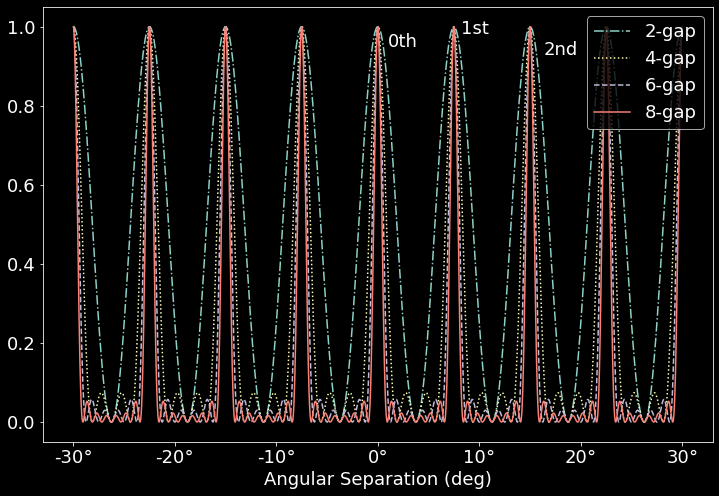

In [37]:
makeplot()

In [38]:
interact(makeplot,
         wavelength=widgets.IntSlider(min=400, max=800, step=25, value=500),
         separation=widgets.FloatSlider(min=1, max=10, value=4, step=0.2),
         norders=widgets.IntSlider(min=1, max=10, value=4),
         gapwidth=widgets.FloatSlider(min=0.75, max=4, value=2),
         sz=widgets.IntSlider(min=128, max=8192, step=128, value=4096)
)

interactive(children=(IntSlider(value=500, description='wavelength', max=800, min=400, step=25), FloatSlider(v…

<function __main__.makeplot(wavelength=500, separation=4, norders=4, gapwidth=0.5, sz=4096)>

In [39]:
wavelength2 = 700*u.nm

second_angle_to_fourth_order = np.arcsin(norders * wavelength2 / separation).to(u.deg)

ftax2 = np.fft.fftshift(np.fft.fftfreq(sz)*scalenumber * second_angle_to_fourth_order)

In [40]:
wavelength3 = 400*u.nm

third_angle_to_fourth_order = np.arcsin(norders * wavelength3 / separation).to(u.deg)

ftax3 = np.fft.fftshift(np.fft.fftfreq(sz)*scalenumber * third_angle_to_fourth_order)

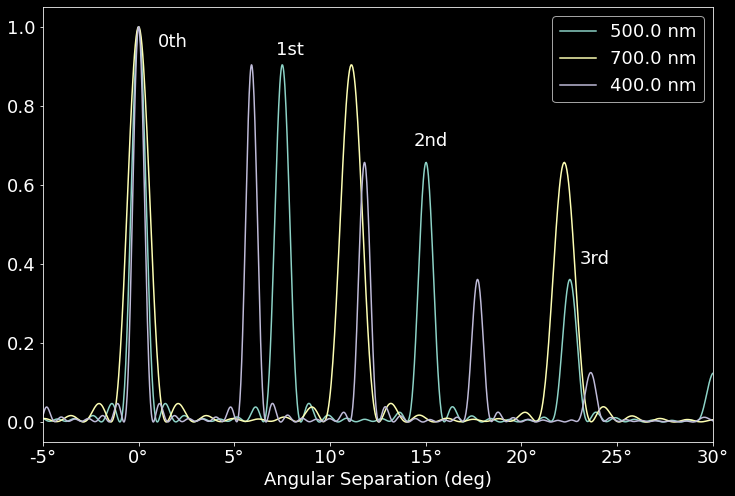

In [41]:
#pl.plot(np.fft.fftshift(twoslitft))
pl.figure(figsize=(12,8))
pl.plot(ftax, np.fft.fftshift(eightslitft), label=f'{wavelength}')
pl.plot(ftax2, np.fft.fftshift(eightslitft), label=f'{wavelength2}')
pl.plot(ftax3, np.fft.fftshift(eightslitft), label=f'{wavelength3}')


pl.xlabel("Angular Separation (deg)")
pl.text(1*u.deg, 0.95, "0th", fontsize=18)
pl.text(angle_to_first_peak , 0.93, "1st", fontsize=18)
pl.text(angle_to_first_peak*2 , 0.7, "2nd", fontsize=18)
pl.text(angle_to_first_peak*3 + 1.5*u.deg, 0.4, "3rd", fontsize=18)



pl.legend(loc='upper right', fontsize=18)
pl.xlim(-5,30)
pl.savefig("images/spectrograph_response_wavelength_dependence.png")

In [42]:
ls images

41550_2020_1174_Fig9_ESM.webp*
500px-Hydrogen-SpinFlip.png*
CCD_BigImage.svg*
CCD_SmallImage.svg*
CCD_SONY_ICX493AQA_sensor_side.jpg*
delayline_dullemond.png*
dipole_feed.png*
dispersed_light_labeledorder.jpg*
dispersed_light_littlefair.jpg*
feedline.jpg*
fluorescentbulbgrating_gray.jpg*
fluorescentbulbgrating.jpg*
focal-reducers-guide_8.jpg*
frontierssgrb2ds_compacted.png*
galacticdiagram.svg*
grating_littlefair.png*
grating_littlefair_whitebg.png*
grating_littlefair_whitebg_two.png*
grating_multislit_littlefair.png*
IMG_20200806_140556.jpg*
IMG_20200806_140612.jpg*
IMG_20200806_140622.jpg*
IMG_20200806_140651.jpg*
improvements_v3new800x800.jpg*
joardar_interferometer.png*
joardar_singledishaperture.png*
joardar_twoaperture_part1.png*
orion2b.jpg*
parabolic_antenna.png*
pepito_topdown.jpg*
PrimeFocus-520x200.jpg*
prism_littlefair.png*
reflectiongrating_whitebg_littlefair.png*
Refractor-553x217.jpg*
reimager.png*
ringnebula_littlefield.png*
ringspectrum_littlefair.png*
rtlsdr_dipole_ki